#EDA#
**Dataset de Satisfacción de Cliente en aerolínea**

Los recién llegados propietarios de Invistico Airlines se enfrentan a un desafío crucial: erradicar la creciente insatisfacción de sus clientes, especialmente entre la demografía más joven, cuyas quejas se manifiestan de manera exacerbada en las plataformas de redes sociales. La empresa busca identificar con precisión cuáles son los motivos preponderantes detrás de las evaluaciones negativas, con el objetivo de trazar un plan estratégico que posibilite mejoras incrementales y sostenibles.

En este contexto, surgen dos necesidades: por un lado, los dueños desean abordar a corto plazo la insatisfacción existente, implementando medidas específicas para primero predecir y luego mitigar la frustración de ciertos segmentos de clientes. Conscientes de que la insatisfacción puede variar entre diferentes perfiles de clientes, la estrategia consiste en anticiparse a los descontentos identificando patrones y ofreciendo incentivos personalizados, como millas de regalo o beneficios exclusivos, para contrarrestar la percepción negativa.

La preocupación no se limita a las quejas actuales, ya que los nuevos propietarios también son conscientes de la posible regulación futura en torno a los algoritmos de inteligencia artificial. Existe el temor de que los algoritmos, diseñados para predecir y abordar la insatisfacción, puedan incurrir en sesgos etarios o de género, generando preocupaciones legales y afectando la reputación de la aerolínea. Para abordar este desafío, los dueños buscan implementar algoritmos que, a pesar de perder cierta capacidad predictiva, respeten estrictamente algunas normas para evitar sesgos indeseados y posibles consecuencias regulatorias.

La búsqueda de una solución integral se ve complementada por la necesidad de evitar falsos positivos, ya que estos podrían traducirse en costos adicionales significativos para la aerolínea



## Importar librerías e inspeccionar los datos ##

In [ ]:
# Montar archivos de Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

# Especifica la ubicación del archivo CSV en tu Google Drive
archivo_csv = '/content/drive/MyDrive/Colab Notebooks/Data Science/Invistico_Airline.csv'

# Carga el archivo CSV en un DataFrame de pandas
df = pd.read_csv(archivo_csv)

In [ ]:

# Ver las primeras 10 filas
df.head(10)



,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Male,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Female,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Male,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Female,Loyal Customer,56,Personal Travel,Business,73,0,0,0,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Male,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,...,2,2,2,4,5,3,4,2,30,26.0


In [ ]:
# Inspeccionar columnas
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [ ]:
# Obtener estadísticas de las columnas
df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


# Preprocesamiento #

In [ ]:
# Buscar valores nulos
df.isna().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [ ]:
# Eliminar filas con valores nulos en 'Arrival Delay in Minutes'
df.dropna(subset=['Arrival Delay in Minutes'], inplace=True)

In [ ]:
# Buscar valores nulos
df.isna().sum()

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [ ]:
# Identificar qué ocurre con los valores en 0
df.loc[df['Food and drink'] == 0].head(50)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Male,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Female,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Male,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Female,Loyal Customer,56,Personal Travel,Business,73,0,0,0,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Male,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,...,2,2,2,4,5,3,4,2,30,26.0


In [ ]:
# Especifica las columnas entre la 7ª y la 20ª
columnas_a_verificar = df.columns[7:21]

# Encuentra las filas donde al menos una columna tenga un valor igual a 0
filas_con_cero = df[columnas_a_verificar].eq(0).any(axis=1)


In [ ]:
# Elimina las filas con al menos un 0 en las columnas especificadas
df = df.loc[~filas_con_cero]

# Convierte columna 'satisfaction' a valores 0 y 1
df['satisfaction'] = df['satisfaction'].map(lambda x: 1 if x == 'satisfied' else 0).astype('uint8')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119255 entries, 1037 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       119255 non-null  uint8  
 1   Gender                             119255 non-null  object 
 2   Customer Type                      119255 non-null  object 
 3   Age                                119255 non-null  int64  
 4   Type of Travel                     119255 non-null  object 
 5   Class                              119255 non-null  object 
 6   Flight Distance                    119255 non-null  int64  
 7   Seat comfort                       119255 non-null  int64  
 8   Departure/Arrival time convenient  119255 non-null  int64  
 9   Food and drink                     119255 non-null  int64  
 10  Gate location                      119255 non-null  int64  
 11  Inflight wifi service              1

In [ ]:
import pandas as pd

# Supongamos que tienes un DataFrame llamado df y deseas convertir las columnas del índice 6 al 22 a uint8.

# Obtén la lista de nombres de las columnas que deseas convertir
columnas_a_convertir = df.columns[7:21]  # Las columnas desde el índice 7 al 20

# Convierte las columnas a uint8
df[columnas_a_convertir] = df[columnas_a_convertir].astype('uint8')
#df['Age'] = df['Age'].astype('uint8')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119255 entries, 1037 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       119255 non-null  uint8  
 1   Gender                             119255 non-null  object 
 2   Customer Type                      119255 non-null  object 
 3   Age                                119255 non-null  int64  
 4   Type of Travel                     119255 non-null  object 
 5   Class                              119255 non-null  object 
 6   Flight Distance                    119255 non-null  int64  
 7   Seat comfort                       119255 non-null  uint8  
 8   Departure/Arrival time convenient  119255 non-null  uint8  
 9   Food and drink                     119255 non-null  uint8  
 10  Gate location                      119255 non-null  uint8  
 11  Inflight wifi service              1

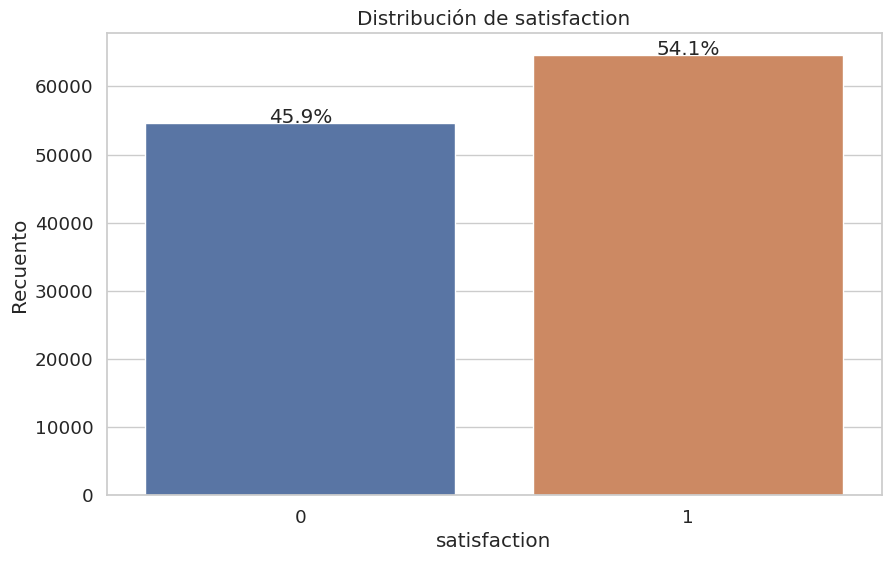

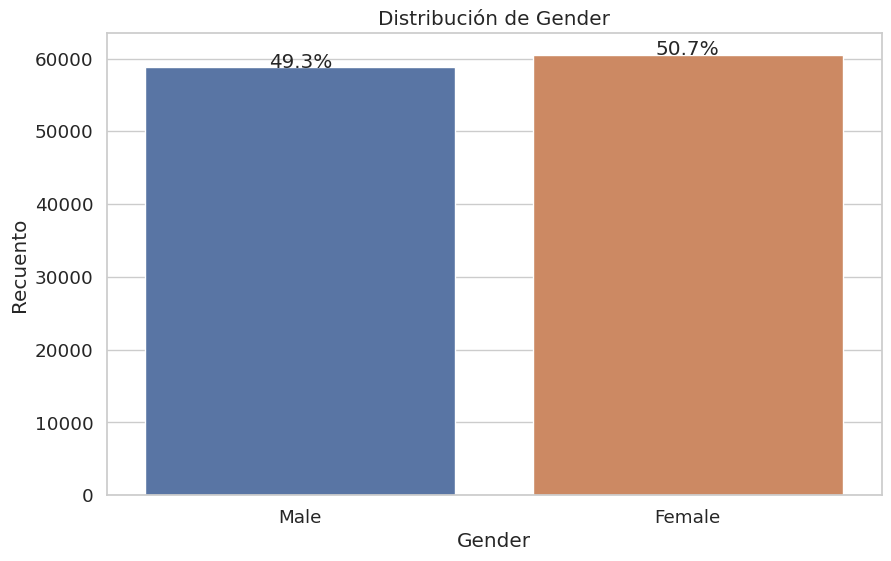

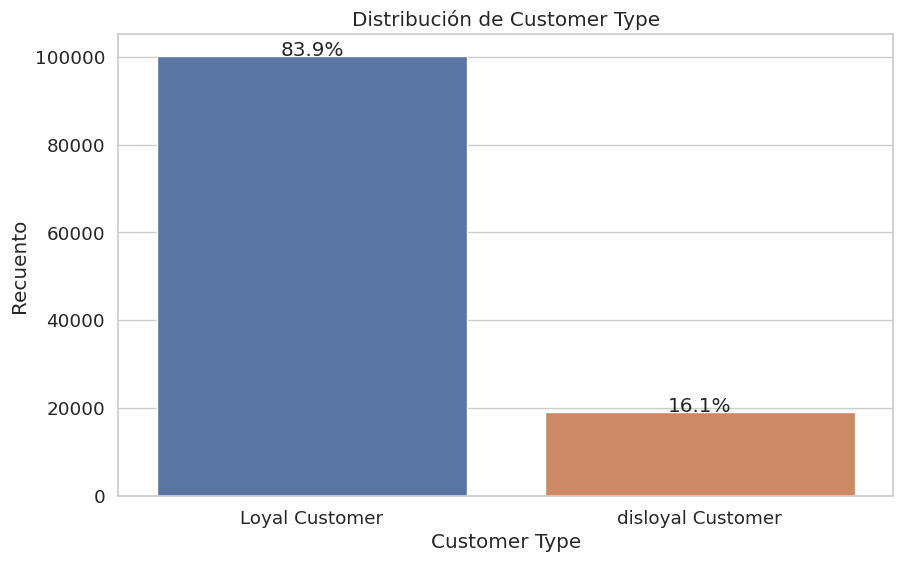

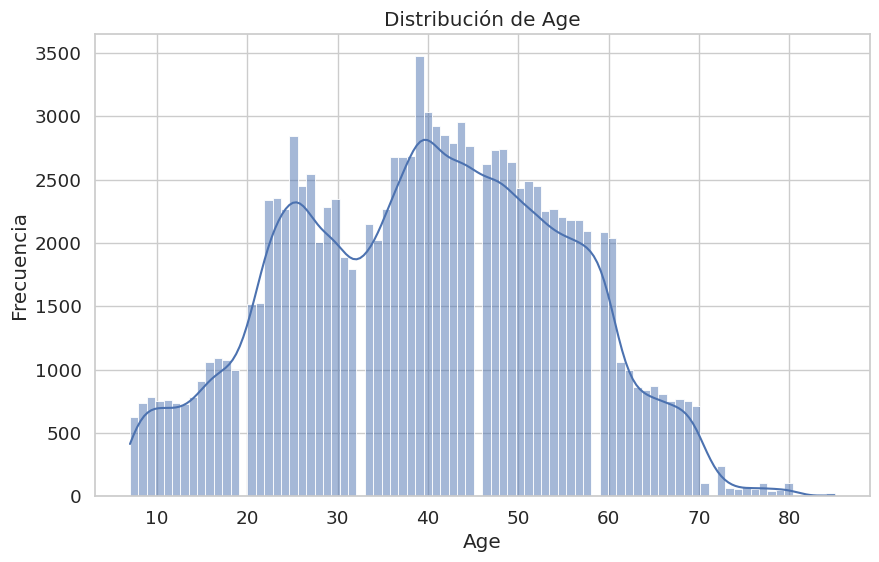

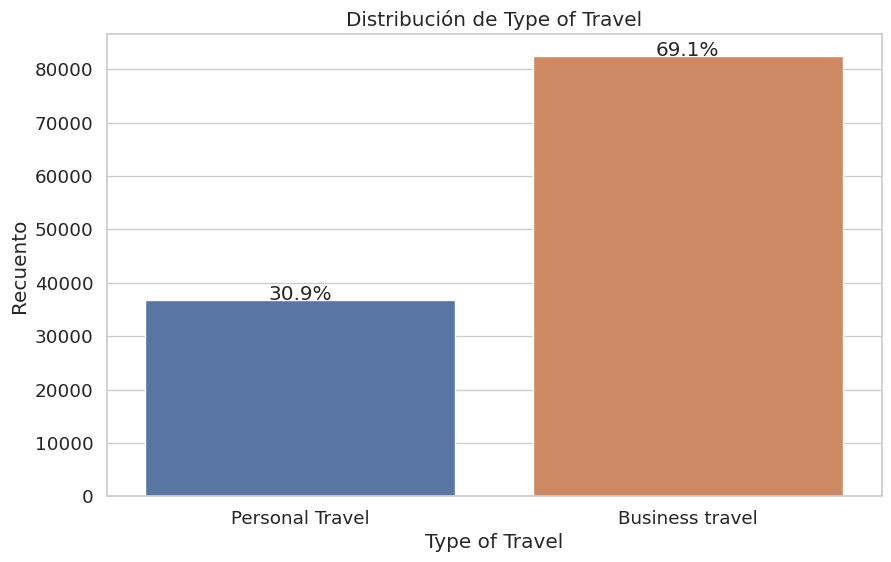

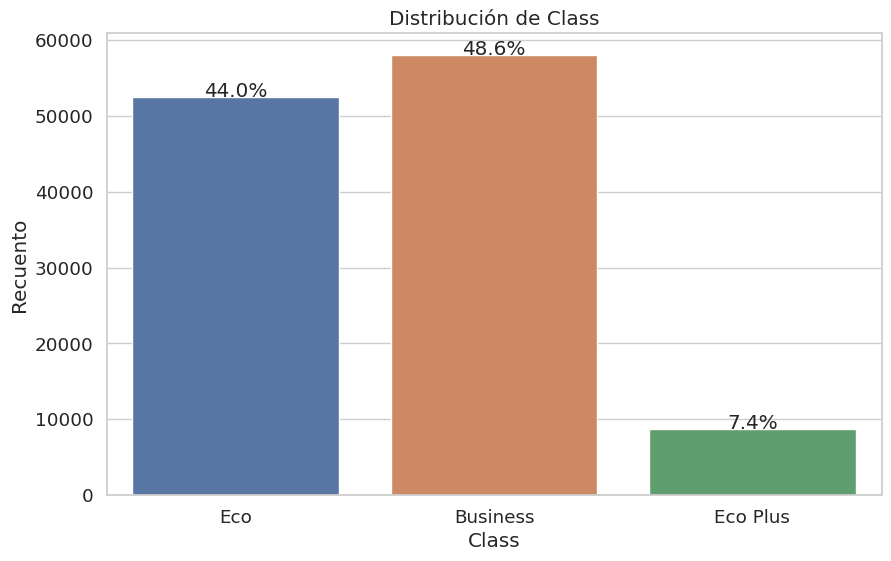

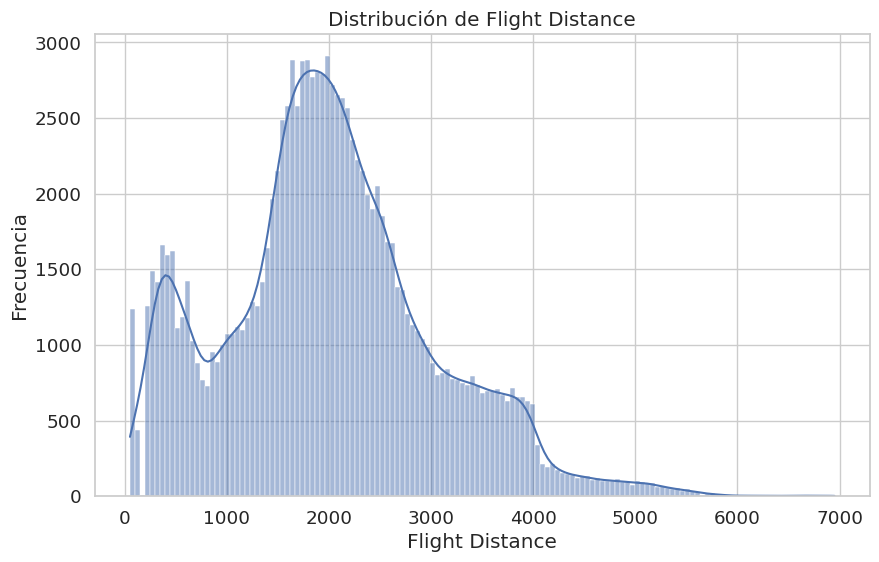

In [ ]:
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Crea una carpeta para guardar las imágenes
if not os.path.exists('graficos'):
    os.makedirs('graficos')

# Ajusta los parámetros de estilo de Seaborn para mejorar la estética
sns.set(style="whitegrid", font_scale=1.2)

# Obtiene las primeras 6 columnas del DataFrame
primeras_columnas = df.columns[:7]

# Itera a través de las primeras 6 columnas
for columna in primeras_columnas:
    # Verifica si la columna es numérica
    if df[columna].dtype in ['int64', 'float64']:
        # Crea un histograma para las variables numéricas
        plt.figure(figsize=(10, 6))
        sns.histplot(df[columna], kde=True)
        plt.title(f'Distribución de {columna}')
        plt.xlabel(columna)
        plt.ylabel('Frecuencia')
        plt.savefig(f'graficos/{columna}_histograma.png')  # Guarda la imagen

    else:
        # Crea un gráfico de barras para las variables categóricas
        plt.figure(figsize=(10, 6))
        ax = sns.countplot(x=columna, data=df)
        plt.title(f'Distribución de {columna}')
        plt.xlabel(columna)
        plt.ylabel('Recuento')

        # Agrega etiquetas de recuento en la parte superior de las barras
        total_data_points = len(df)  # Calcula el número total de datos
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height() / total_data_points)
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            ax.annotate(percentage, (x, y), ha='center')

        plt.savefig(f'graficos/{columna}_barplot.png')  # Guarda la imagen
    plt.show()
    plt.close()  # Cierra la figura



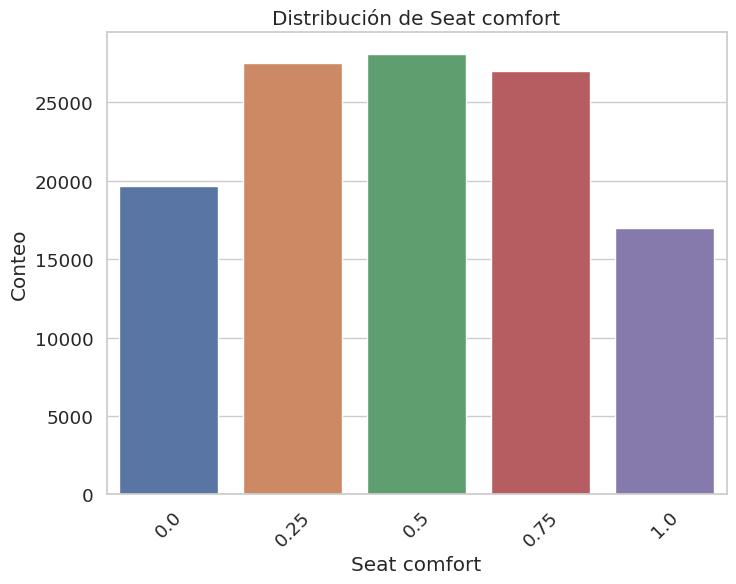

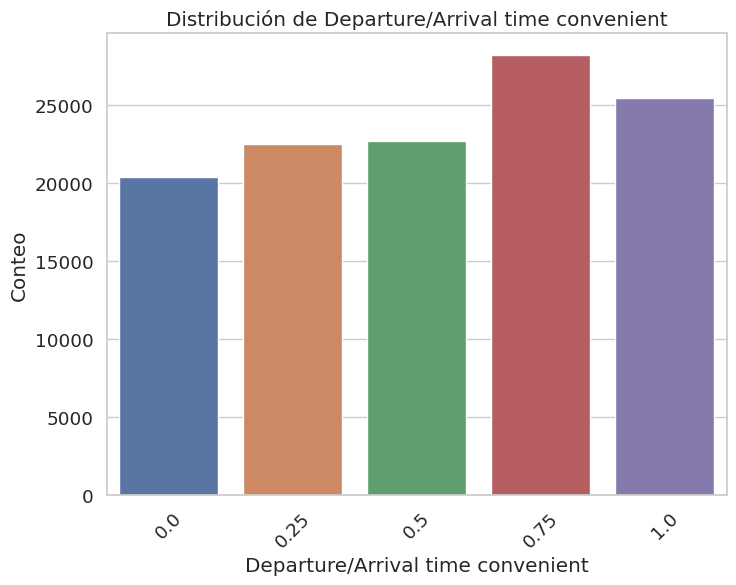

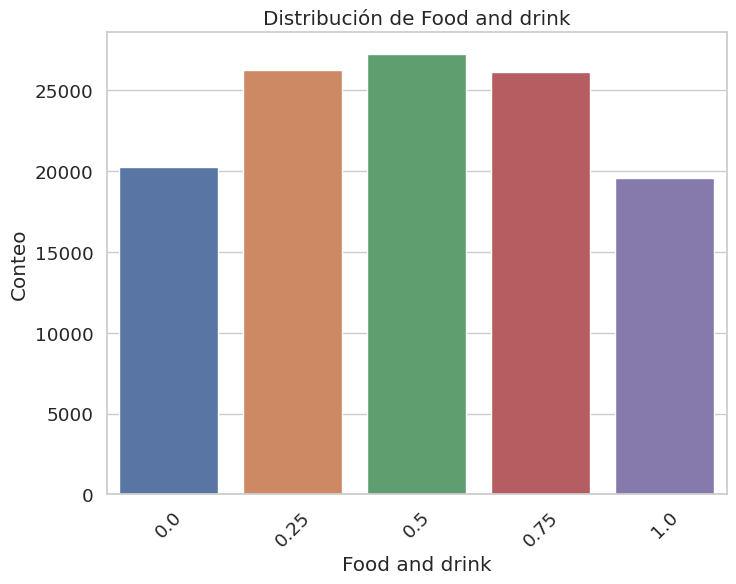

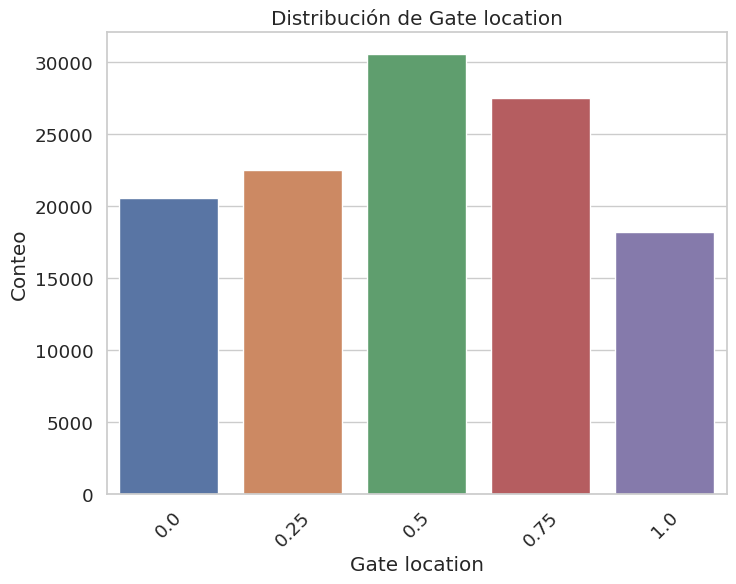

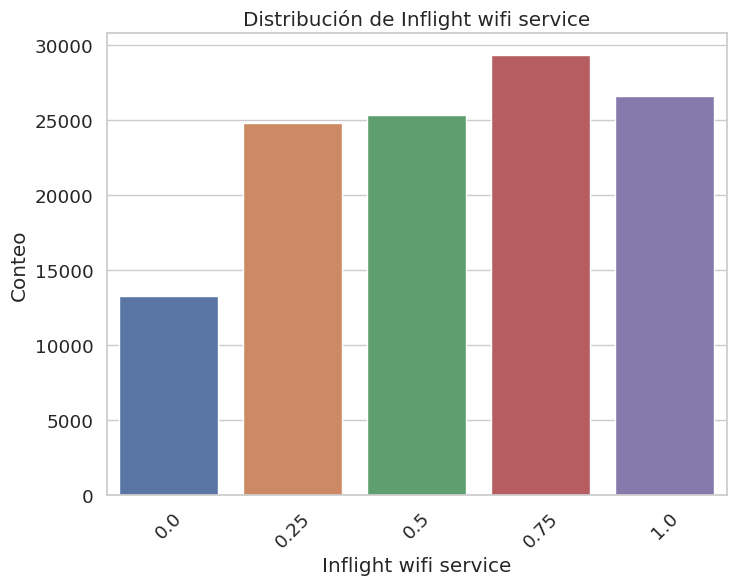

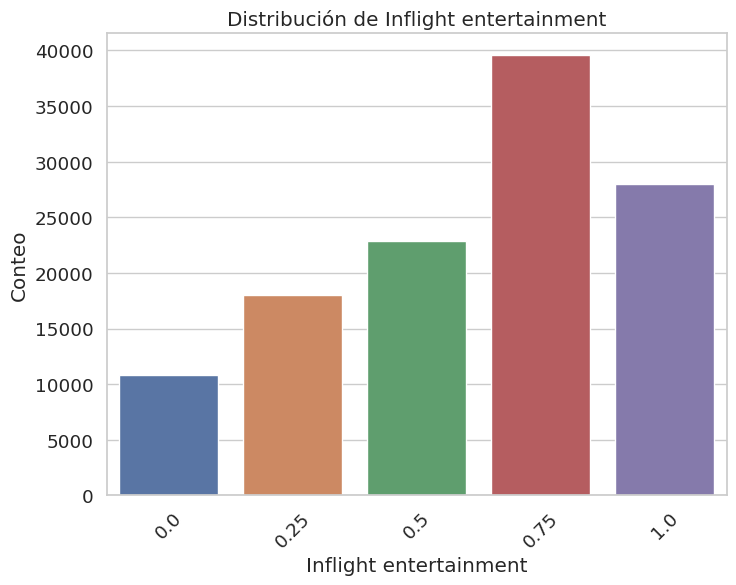

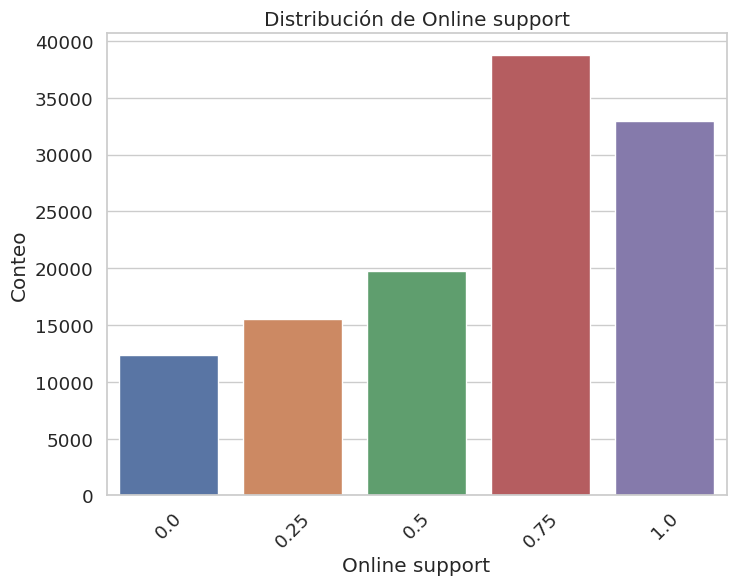

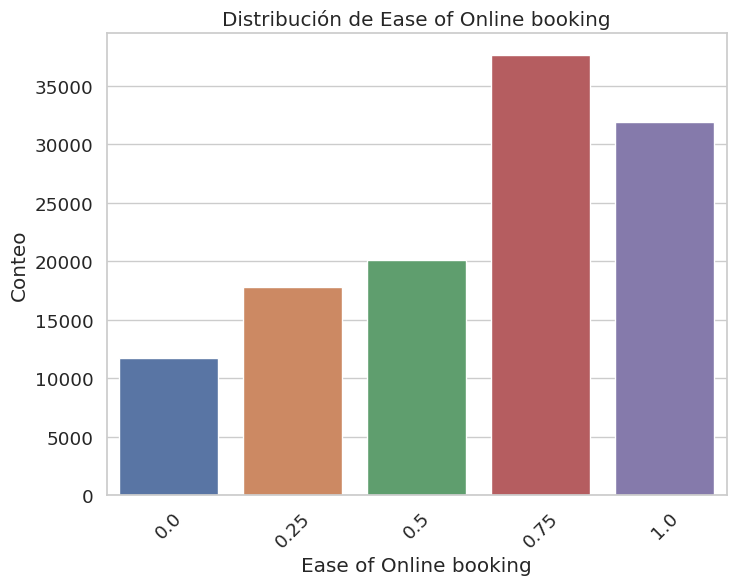

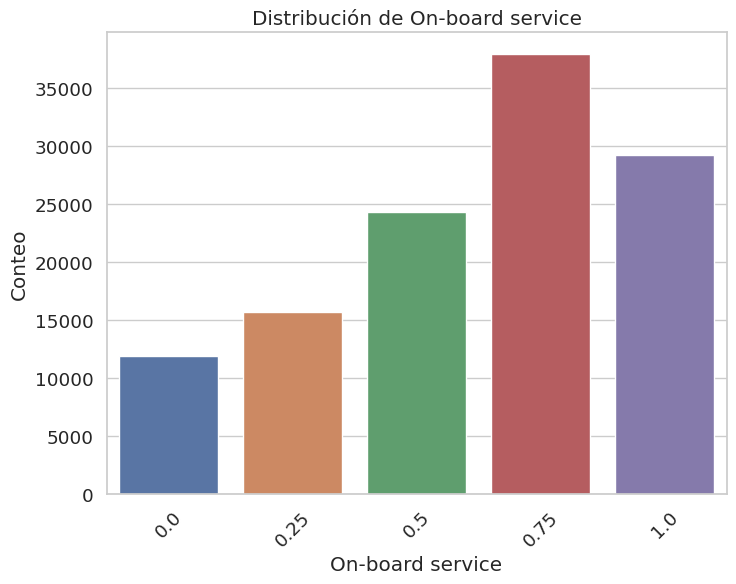

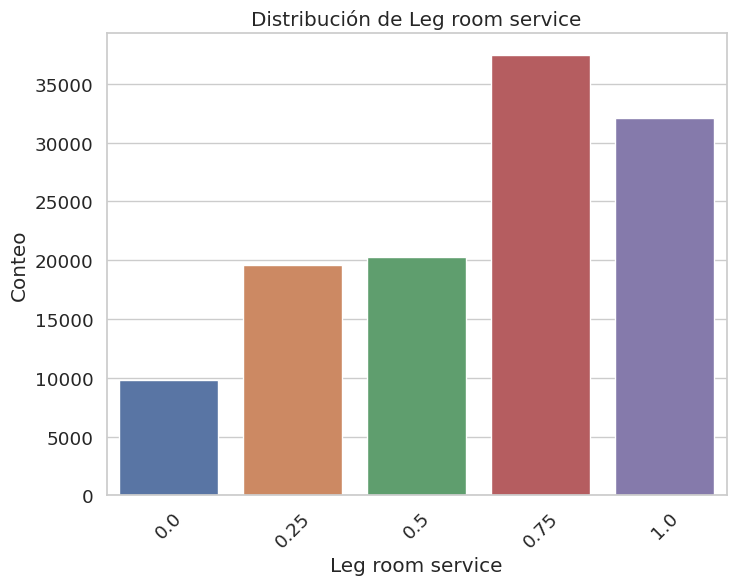

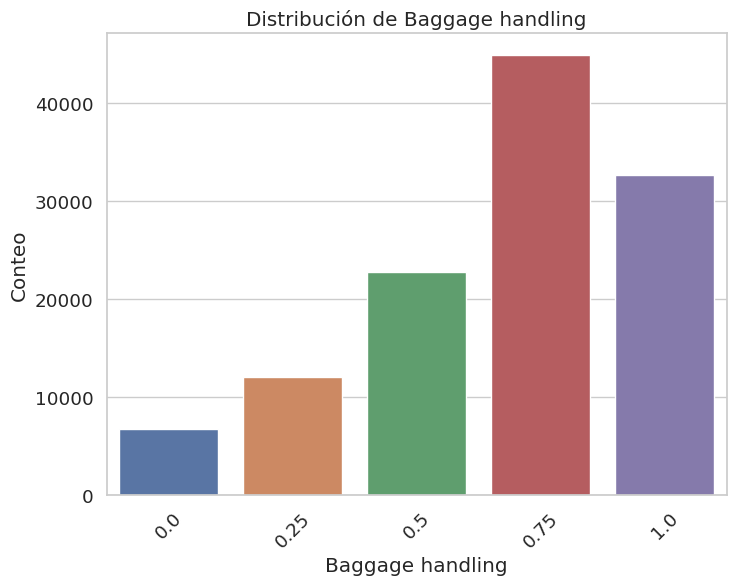

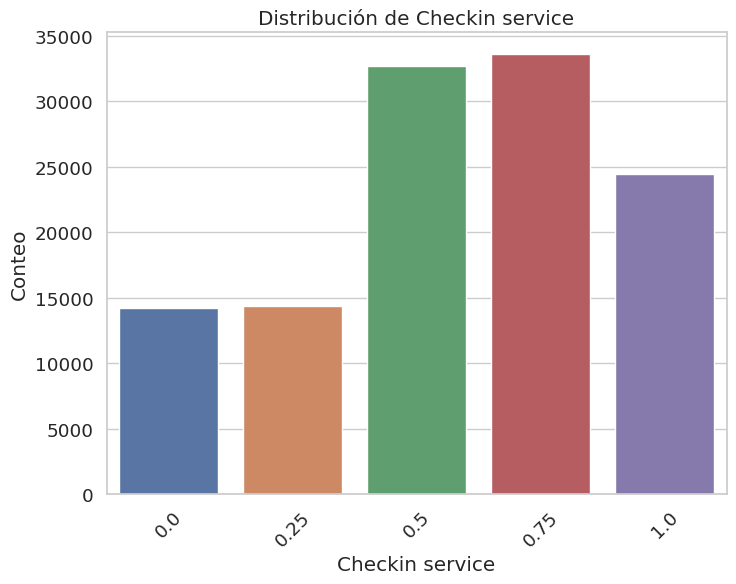

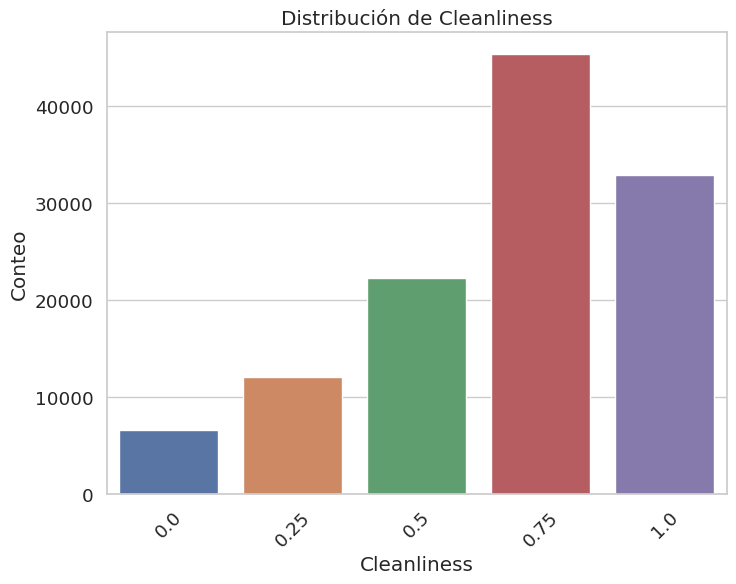

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Obtén las segundas columnas
segundas_columnas = df.columns[7:20]

# Crea una instancia de MinMaxScaler
scaler = MinMaxScaler()

# Aplica la normalización a las columnas seleccionadas
df[segundas_columnas] = scaler.fit_transform(df[segundas_columnas])

# Crea un bucle para generar gráficos de barras para cada columna
for columna in segundas_columnas:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=columna, data=df)
    plt.title(f'Distribución de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Conteo')
    plt.xticks(rotation=45)  # Rotar etiquetas en el eje x si es necesario
    plt.show()



In [ ]:
import pandas as pd


# Función para asignar las categorías
def asignar_categorias(clase):
    if clase == 0:
        return 'Sin Retraso'
    elif clase > 0 and clase < 30:
        return 'Menos de 30 minutos'
    elif clase > 30 and clase < 60:
        return 'Entre 30 y 60 minutos'
    elif clase > 60 and clase < 180:
        return 'Entre 60 y 180 minutos'
    elif clase > 180:
        return 'Más de 60 minutos'

# Aplica la función a la columna 'Arrival Delay Class' y crea la nueva columna 'Arrival Delay'
df['Arrival Delay'] = df['Arrival Delay in Minutes'].apply(asignar_categorias)

# Muestra las primeras filas del DataFrame para verificar la nueva columna
print(df.head())




      satisfaction Gender   Customer Type  Age   Type of Travel Class  \
1037             0   Male  Loyal Customer   48  Personal Travel   Eco   
1038             0   Male  Loyal Customer   48  Personal Travel   Eco   
1041             0   Male  Loyal Customer   40  Personal Travel   Eco   
1043             0   Male  Loyal Customer   46  Personal Travel   Eco   
1044             0   Male  Loyal Customer   63  Personal Travel   Eco   

      Flight Distance  Seat comfort  Departure/Arrival time convenient  \
1037             4001           0.0                                0.0   
1038             3980           0.0                                0.0   
1041             2251           0.0                                0.0   
1043             2453           0.0                                0.0   
1044             2011           0.0                                0.0   

      Food and drink  ...  Ease of Online booking  On-board service  \
1037             0.0  ...                    

In [ ]:
# Aplica la función a la columna 'Arrival Delay Class' y crea la nueva columna 'Arrival Delay'
df['Departure Delay'] = df['Departure Delay in Minutes'].apply(asignar_categorias)


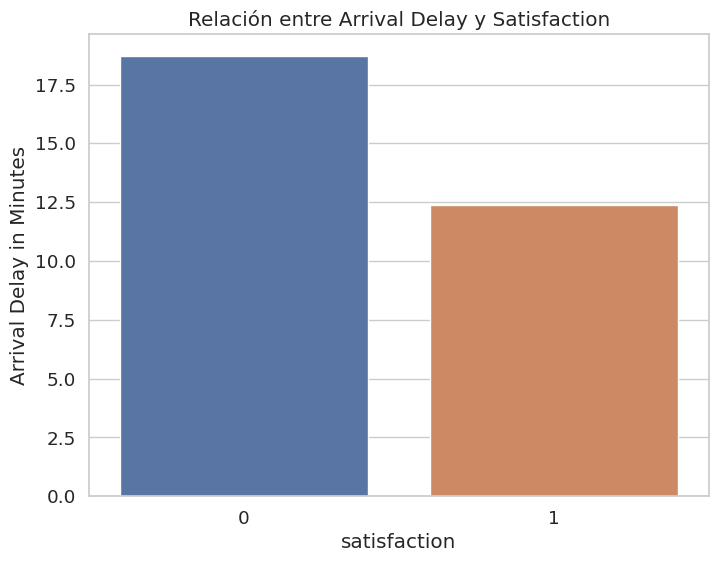

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='satisfaction', y='Arrival Delay in Minutes', data=df, errorbar=None)
plt.title('Relación entre Arrival Delay y Satisfaction')
plt.show()

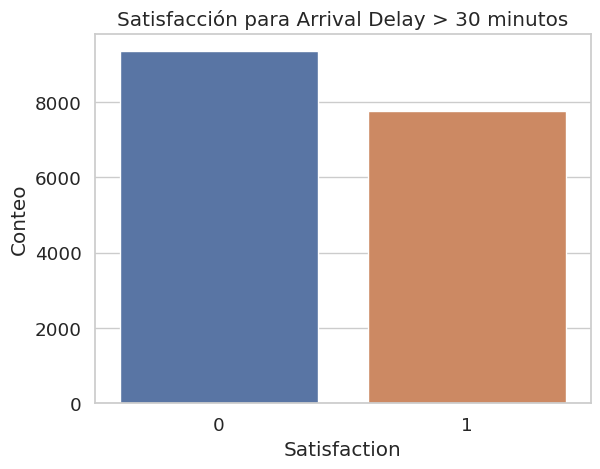

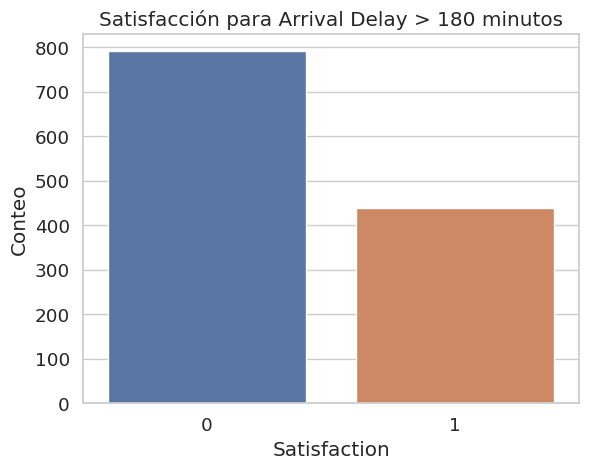

In [ ]:
# Filtra el DataFrame para incluir solo las filas con Arrival Delay > 0
df_delay_lt_30 = df[df['Arrival Delay in Minutes'] > 30]
df_delay_lt_180 = df[df['Arrival Delay in Minutes'] > 180]

# Crea un gráfico de barras para la satisfacción en función de Arrival Delay > 30
sns.countplot(x='satisfaction', data=df_delay_lt_30)
plt.title('Satisfacción para Arrival Delay > 30 minutos')
plt.xlabel('Satisfaction')
plt.ylabel('Conteo')
plt.show()

# Crea un gráfico de barras para la satisfacción en función de Arrival Delay > 180
sns.countplot(x='satisfaction', data=df_delay_lt_180)
plt.title('Satisfacción para Arrival Delay > 180 minutos')
plt.xlabel('Satisfaction')
plt.ylabel('Conteo')
plt.show()

# Correlación entre features #

In [ ]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119255 entries, 1037 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       119255 non-null  uint8  
 1   Gender                             119255 non-null  object 
 2   Customer Type                      119255 non-null  object 
 3   Age                                119255 non-null  int64  
 4   Type of Travel                     119255 non-null  object 
 5   Class                              119255 non-null  object 
 6   Flight Distance                    119255 non-null  int64  
 7   Seat comfort                       119255 non-null  float64
 8   Departure/Arrival time convenient  119255 non-null  float64
 9   Food and drink                     119255 non-null  float64
 10  Gate location                      119255 non-null  float64
 11  Inflight wifi service              1

In [ ]:
# Calcula el valor máximo entre las dos columnas y crea una nueva columna "Tiempo de espera".
df['Tiempo de espera'] = df[['Departure Delay in Minutes', 'Arrival Delay in Minutes']].max(axis=1).astype(int)

df.head(10)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Arrival Delay,Departure Delay,Tiempo de espera
1037,0,Male,Loyal Customer,48,Personal Travel,Eco,4001,0.0,0.0,0.0,...,0.00,0.00,0.75,0.25,1,16,0.0,Sin Retraso,Menos de 30 minutos,16
1038,0,Male,Loyal Customer,48,Personal Travel,Eco,3980,0.0,0.0,0.0,...,0.50,0.25,0.50,0.25,4,0,0.0,Sin Retraso,Sin Retraso,0
1041,0,Male,Loyal Customer,40,Personal Travel,Eco,2251,0.0,0.0,0.0,...,0.50,0.25,0.00,0.00,1,0,8.0,Menos de 30 minutos,Sin Retraso,8
1043,0,Male,Loyal Customer,46,Personal Travel,Eco,2453,0.0,0.0,0.0,...,0.75,0.00,0.25,0.25,3,3,15.0,Menos de 30 minutos,Menos de 30 minutos,15
1044,0,Male,Loyal Customer,63,Personal Travel,Eco,2011,0.0,0.0,0.0,...,1.00,0.25,0.00,0.25,5,25,25.0,Menos de 30 minutos,Menos de 30 minutos,25
1047,0,Male,Loyal Customer,28,Personal Travel,Eco,1965,0.0,0.0,0.0,...,0.25,0.00,0.50,0.25,5,10,7.0,Menos de 30 minutos,Menos de 30 minutos,10
1049,0,Male,Loyal Customer,41,Personal Travel,Eco,2471,0.0,0.0,0.0,...,0.00,0.25,0.50,0.25,5,0,0.0,Sin Retraso,Sin Retraso,0
1050,0,Male,Loyal Customer,13,Personal Travel,Eco,1647,0.0,0.0,0.0,...,0.75,0.00,0.25,0.00,3,39,18.0,Menos de 30 minutos,Entre 30 y 60 minutos,39
1051,0,Male,Loyal Customer,29,Personal Travel,Eco,2214,0.0,0.0,0.0,...,0.25,0.25,0.25,0.00,4,0,0.0,Sin Retraso,Sin Retraso,0
1052,0,Male,Loyal Customer,45,Personal Travel,Eco,2172,0.0,0.0,0.0,...,1.00,0.00,0.00,0.25,2,6,3.0,Menos de 30 minutos,Menos de 30 minutos,6


In [ ]:


# Elimina las dos columnas originales.
df.drop(['Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Arrival Delay', 'Departure Delay'], axis=1, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119255 entries, 1037 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       119255 non-null  uint8  
 1   Gender                             119255 non-null  object 
 2   Customer Type                      119255 non-null  object 
 3   Age                                119255 non-null  int64  
 4   Type of Travel                     119255 non-null  object 
 5   Class                              119255 non-null  object 
 6   Flight Distance                    119255 non-null  int64  
 7   Seat comfort                       119255 non-null  float64
 8   Departure/Arrival time convenient  119255 non-null  float64
 9   Food and drink                     119255 non-null  float64
 10  Gate location                      119255 non-null  float64
 11  Inflight wifi service              1

In [ ]:
df.head(10)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Tiempo de espera
1037,0,Male,Loyal Customer,48,Personal Travel,Eco,4001,0.0,0.0,0.0,...,0.0,0.00,0.00,0.75,0.00,0.00,0.75,0.25,1,16
1038,0,Male,Loyal Customer,48,Personal Travel,Eco,3980,0.0,0.0,0.0,...,0.0,0.75,0.75,0.25,0.50,0.25,0.50,0.25,4,0
1041,0,Male,Loyal Customer,40,Personal Travel,Eco,2251,0.0,0.0,0.0,...,0.0,0.00,0.00,0.50,0.50,0.25,0.00,0.00,1,8
1043,0,Male,Loyal Customer,46,Personal Travel,Eco,2453,0.0,0.0,0.0,...,0.0,1.00,0.50,0.00,0.75,0.00,0.25,0.25,3,15
1044,0,Male,Loyal Customer,63,Personal Travel,Eco,2011,0.0,0.0,0.0,...,0.0,1.00,1.00,0.00,1.00,0.25,0.00,0.25,5,25
1047,0,Male,Loyal Customer,28,Personal Travel,Eco,1965,0.0,0.0,0.0,...,0.0,1.00,1.00,0.50,0.25,0.00,0.50,0.25,5,10
1049,0,Male,Loyal Customer,41,Personal Travel,Eco,2471,0.0,0.0,0.0,...,0.0,1.00,1.00,0.25,0.00,0.25,0.50,0.25,5,0
1050,0,Male,Loyal Customer,13,Personal Travel,Eco,1647,0.0,0.0,0.0,...,0.0,0.50,0.50,0.50,0.75,0.00,0.25,0.00,3,39
1051,0,Male,Loyal Customer,29,Personal Travel,Eco,2214,0.0,0.0,0.0,...,0.0,0.50,0.75,0.50,0.25,0.25,0.25,0.00,4,0
1052,0,Male,Loyal Customer,45,Personal Travel,Eco,2172,0.0,0.0,0.0,...,0.0,0.25,0.25,0.00,1.00,0.00,0.00,0.25,2,6


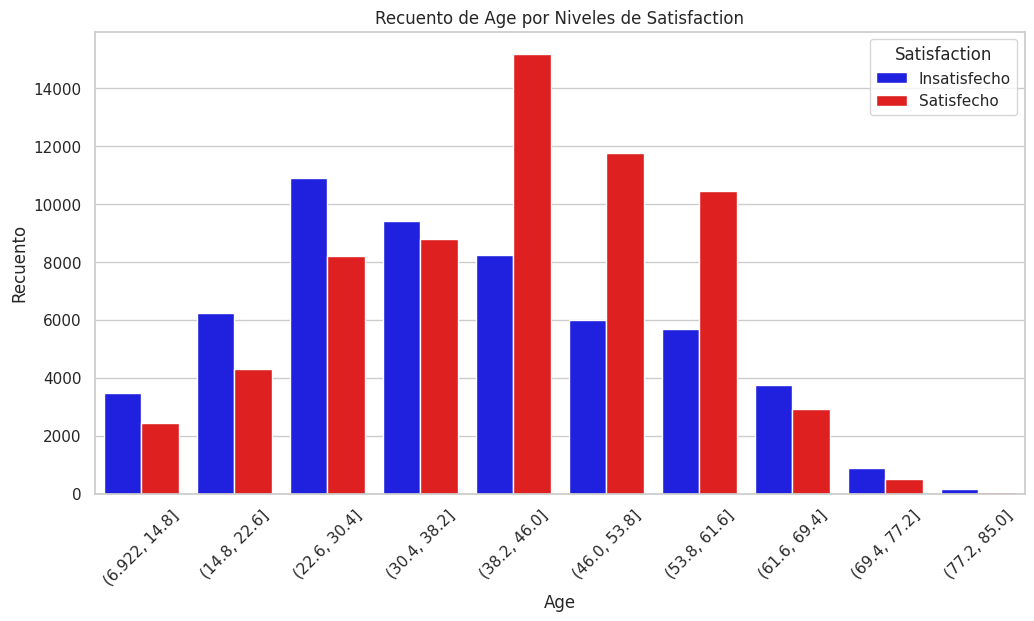

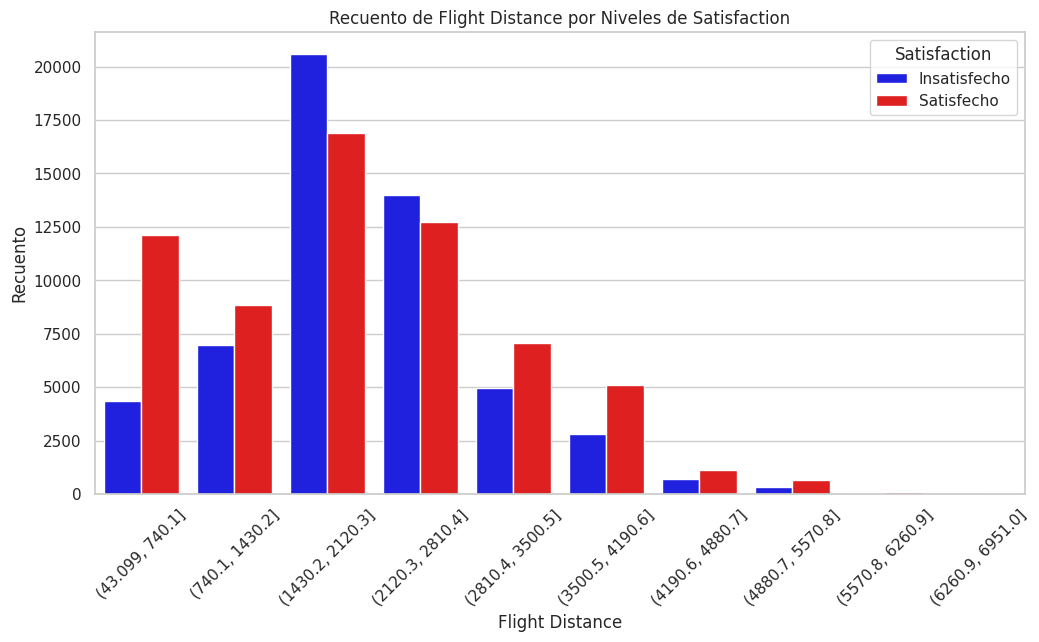

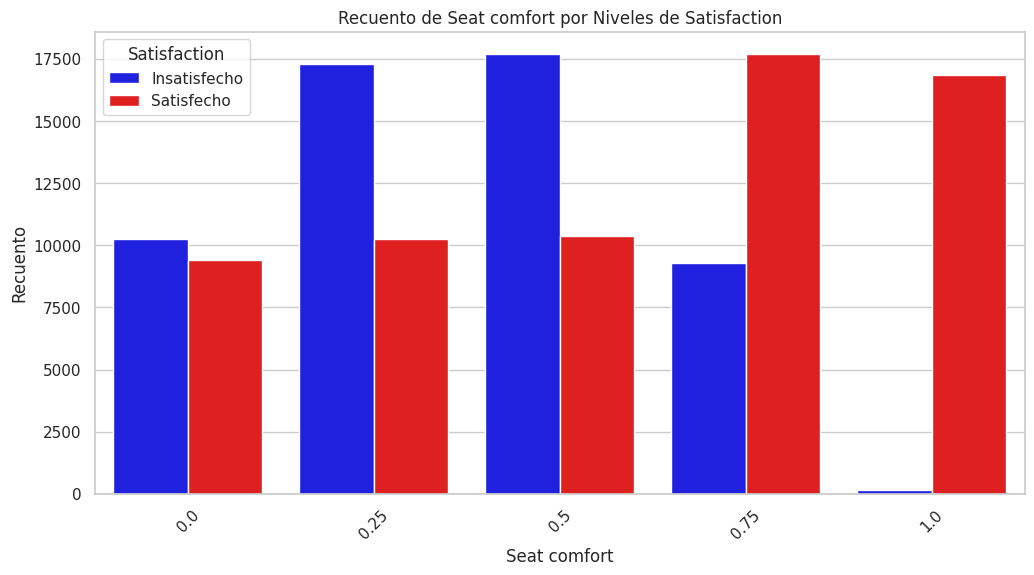

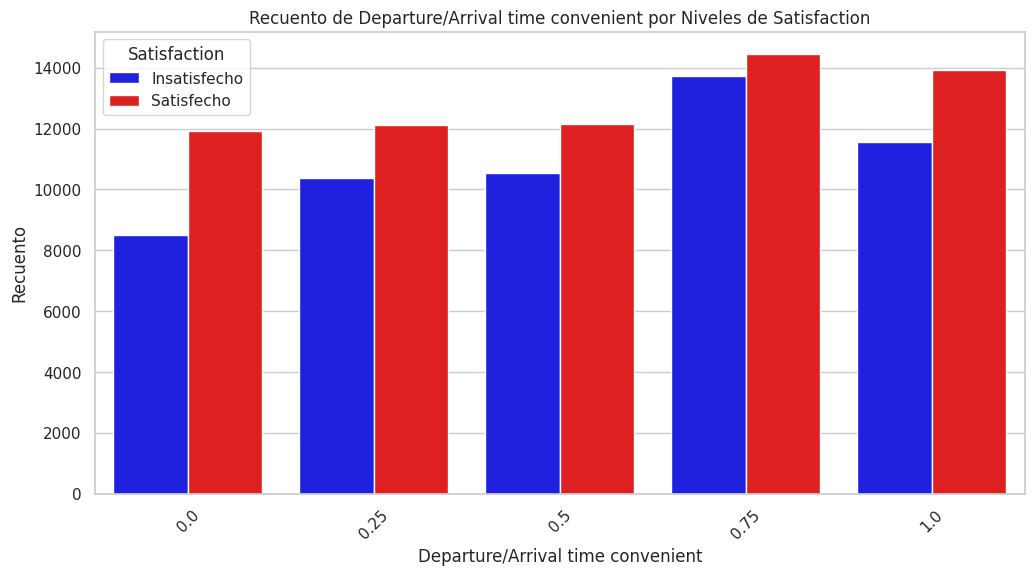

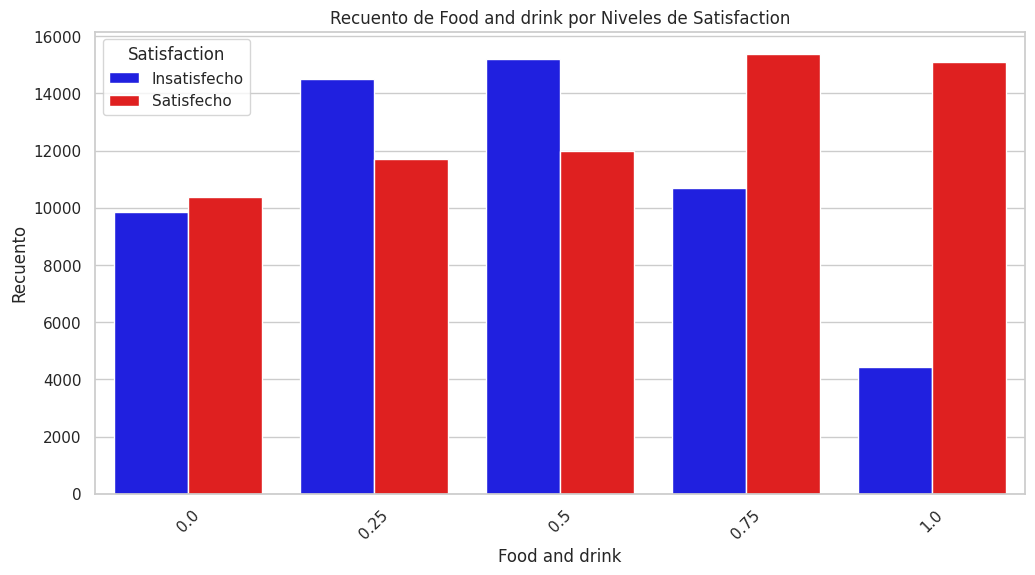

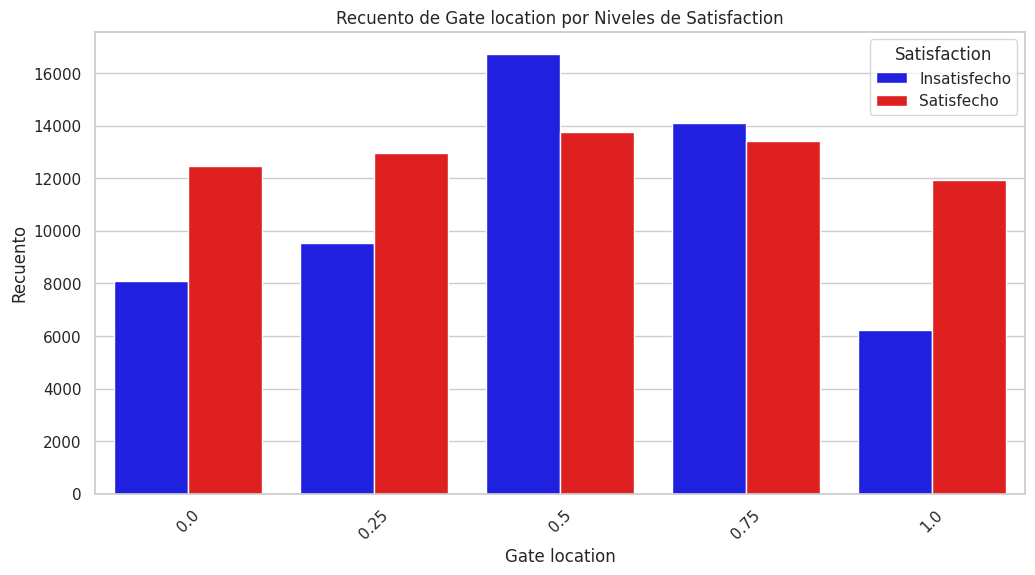

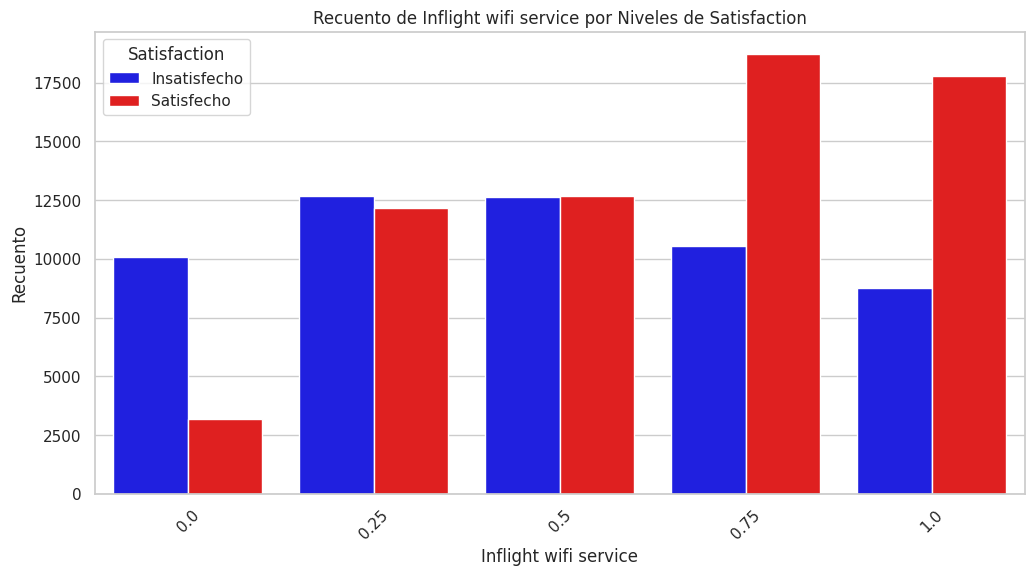

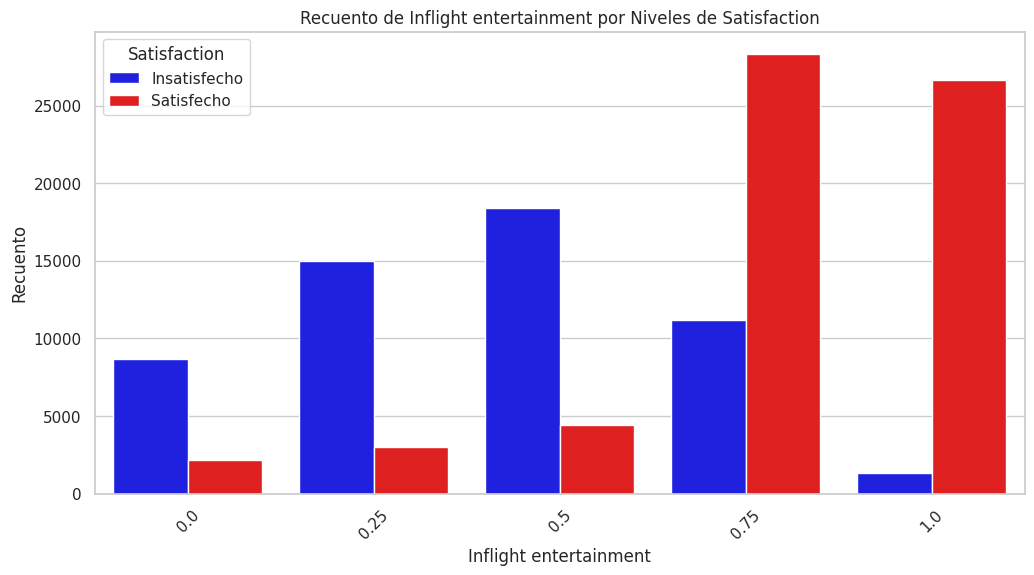

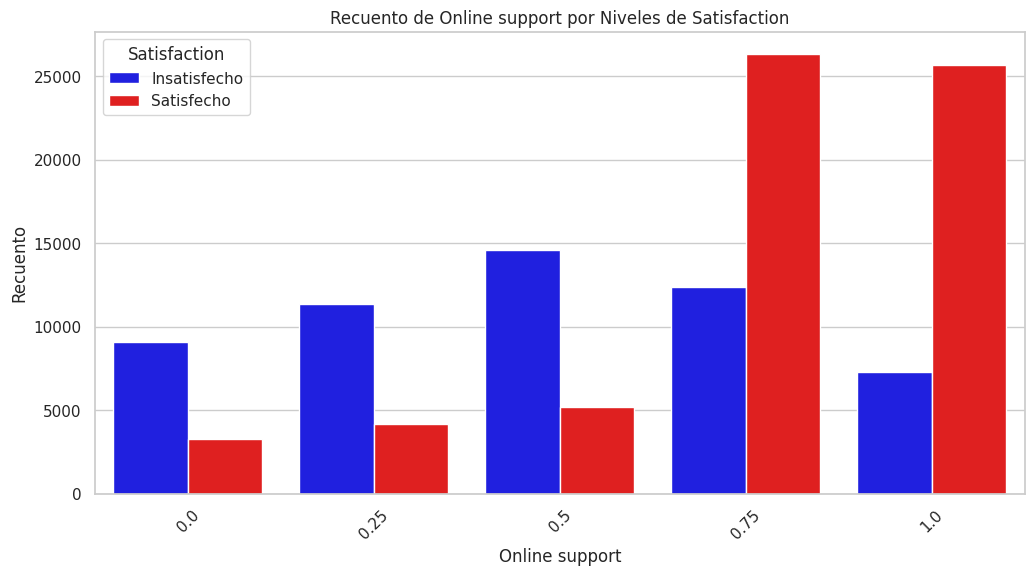

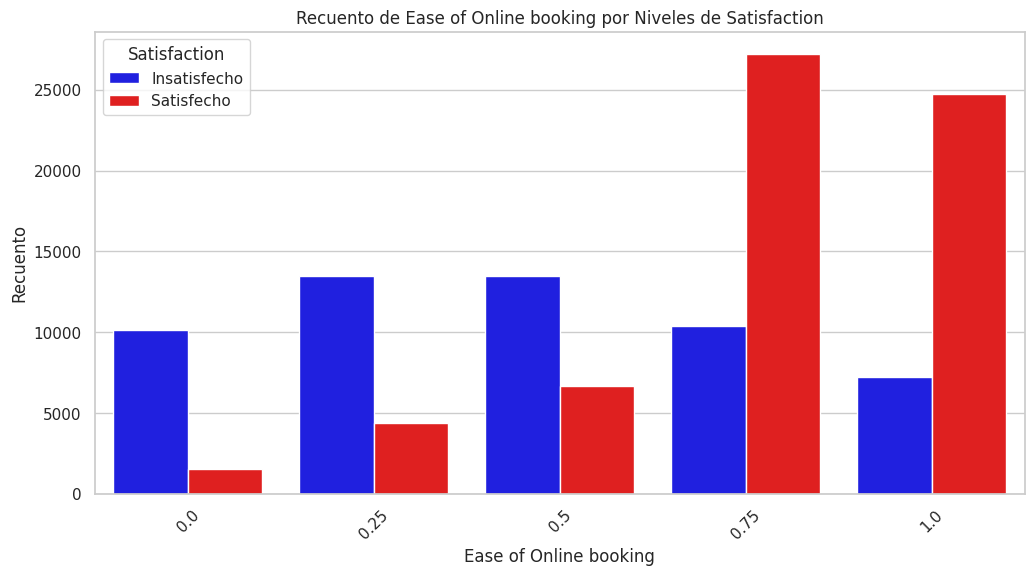

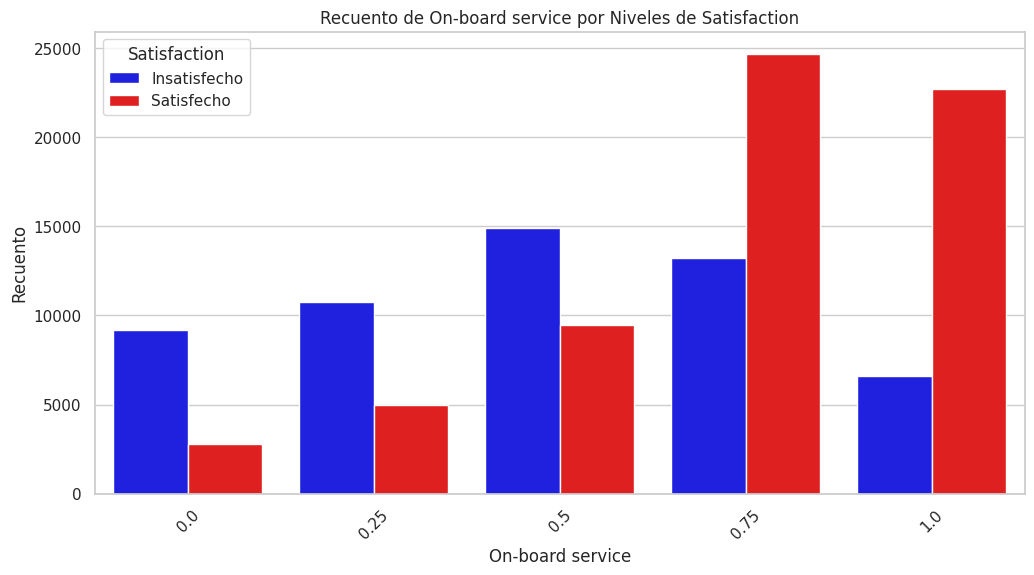

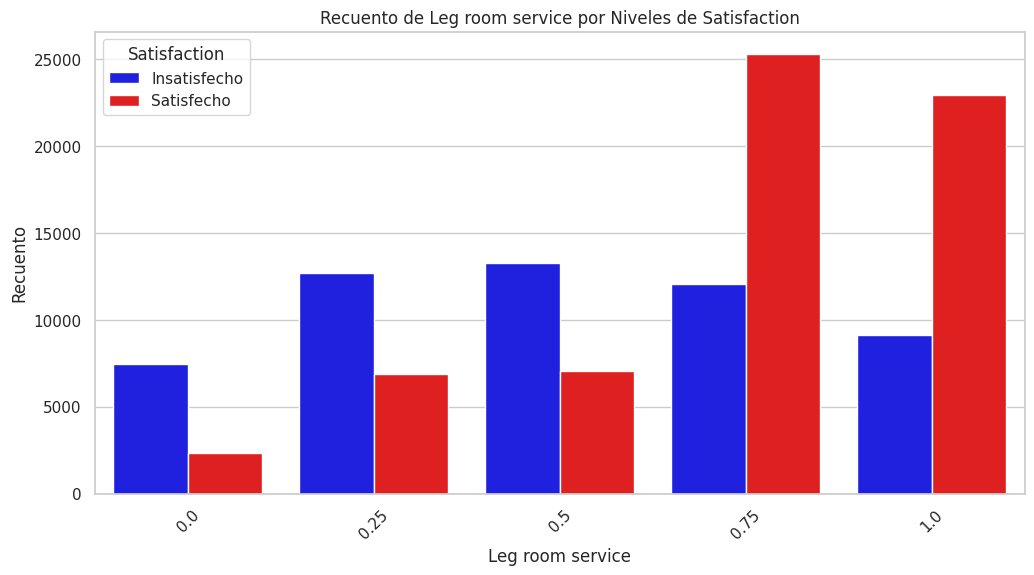

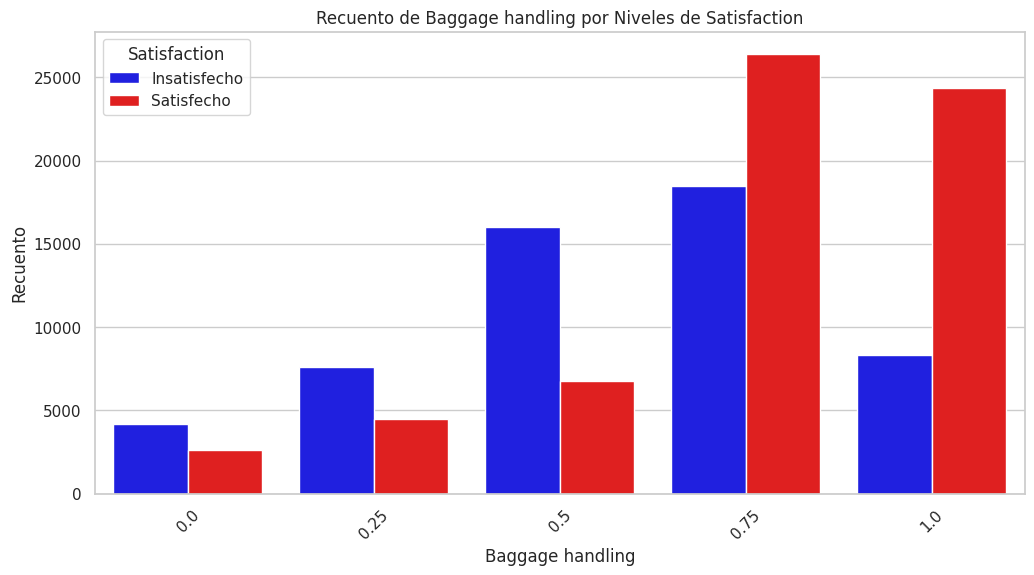

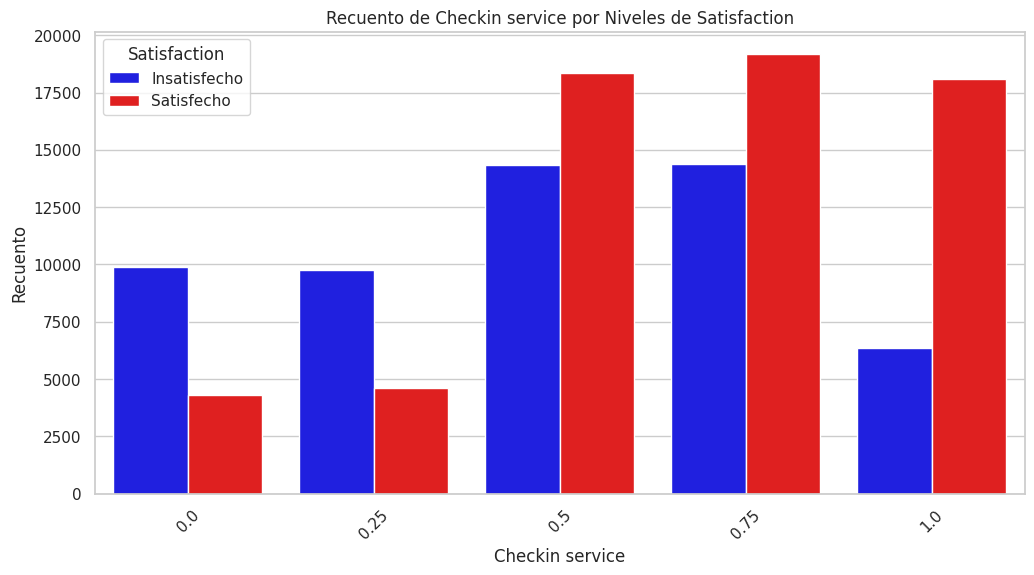

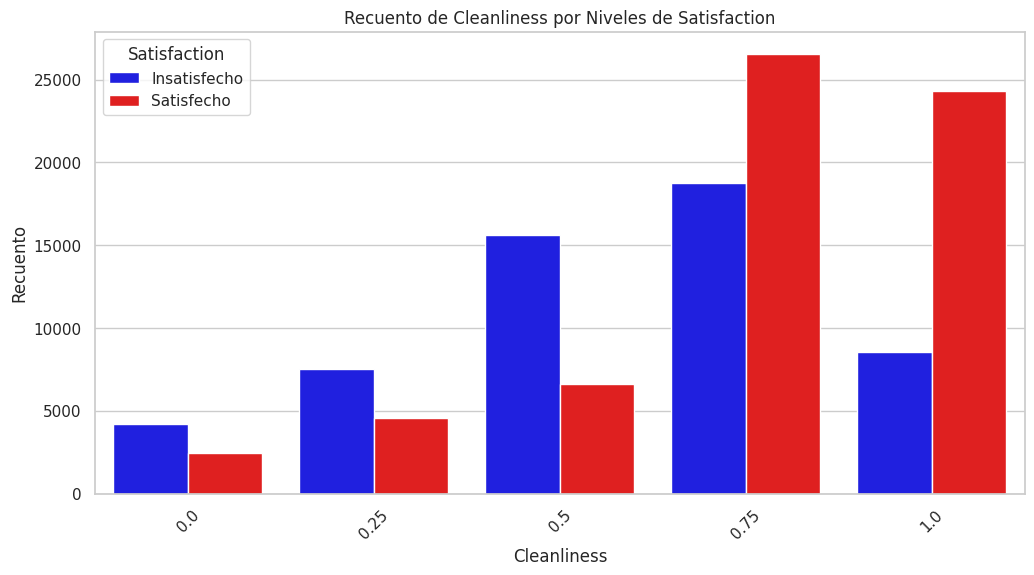

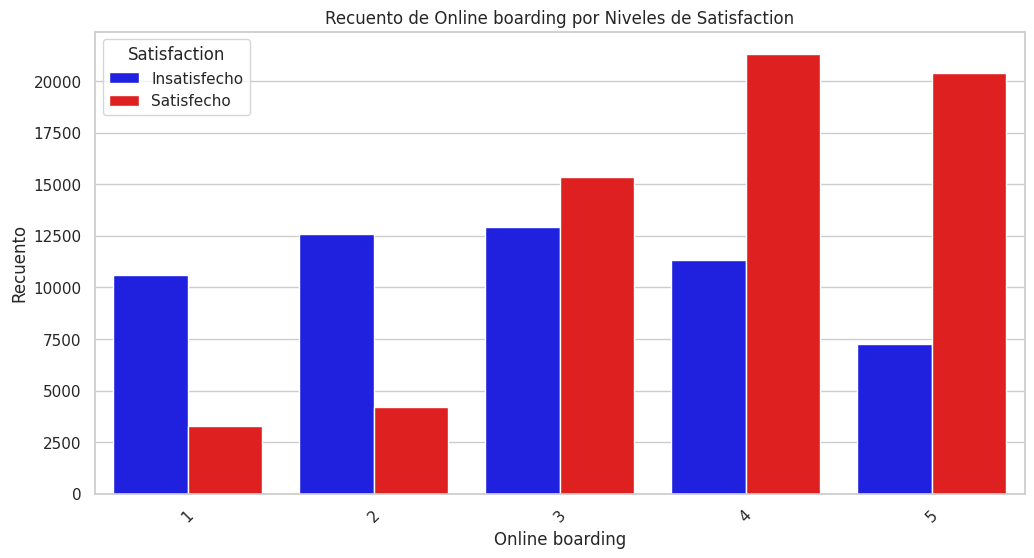

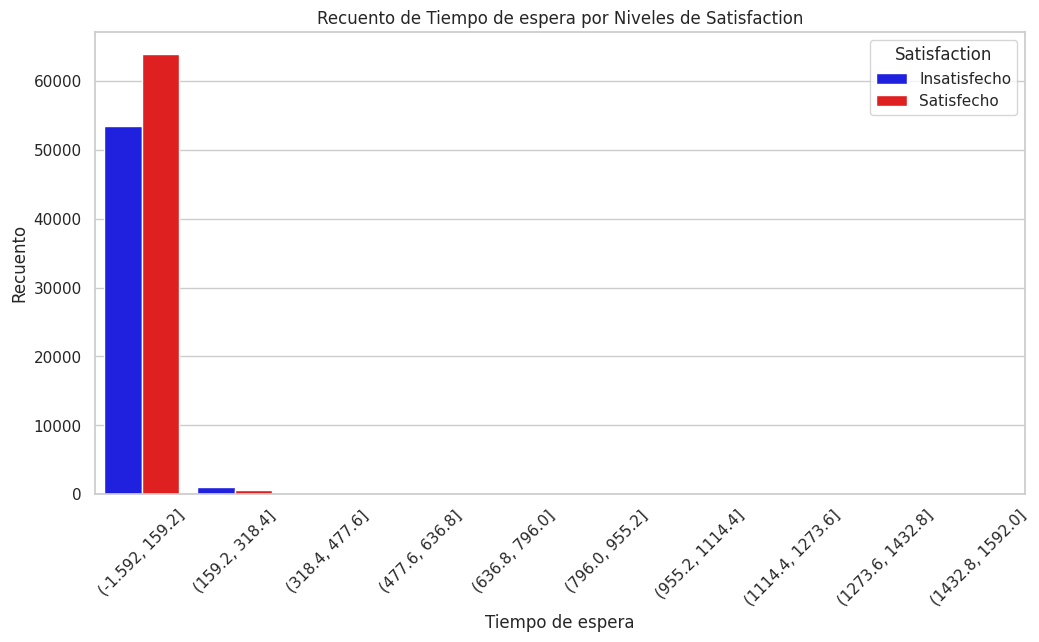

In [ ]:
# Obtén la lista de todas las columnas numéricas (excluyendo 'satisfaction')
numeric_columns = df.select_dtypes(include='number').columns

# Configura el estilo de los gráficos
sns.set(style="whitegrid")

# Define el umbral para aplicar bins
threshold_for_bins = 10

# Crea un bucle para generar gráficos de recuento para todas las variables numéricas
for column in numeric_columns:
    if column != 'satisfaction':
        num_unique_values = df[column].nunique()
        if num_unique_values > threshold_for_bins:
            # Aplicar bins para variables con más de 10 valores únicos
            df['binned_' + column] = pd.cut(df[column], bins=10)  # Divide en 10 intervalos
            x_label = 'binned_' + column
        else:
            x_label = column

        plt.figure(figsize=(12, 6))
        sns.countplot(data=df, x=x_label, hue='satisfaction', palette={0: 'blue', 1: 'red'})
        plt.xlabel(column)
        plt.ylabel("Recuento")
        plt.title(f"Recuento de {column} por Niveles de Satisfaction")
        plt.xticks(rotation=45)  # Rotar etiquetas para mejorar la legibilidad
        plt.legend(title='Satisfaction', labels=['Insatisfecho', 'Satisfecho'])
        plt.show()

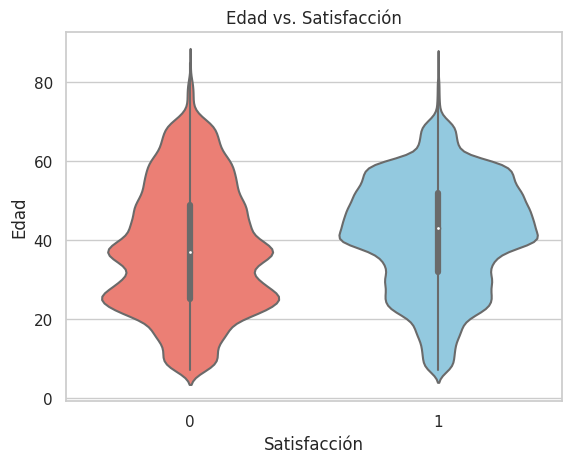

In [ ]:
# Crear un gráfico de violín
sns.violinplot(x='satisfaction', y='Age', data=df, palette=['#FF6F61', '#87CEEB'])

# Añadir etiquetas y título
plt.xlabel('Satisfacción')
plt.ylabel('Edad')
plt.title('Edad vs. Satisfacción')

# Mostrar el gráfico
plt.show()

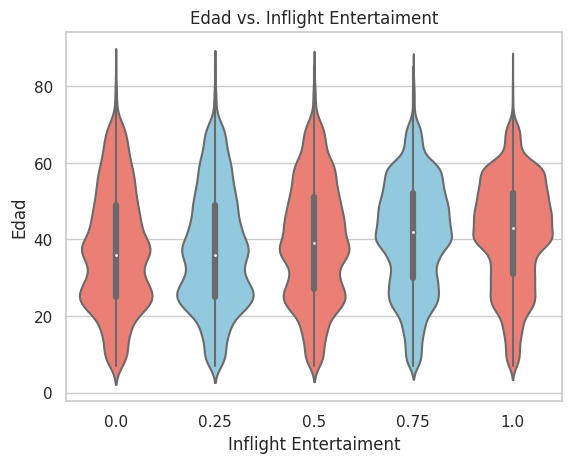

In [ ]:
# Crear un gráfico de violín
sns.violinplot(x='Inflight entertainment', y='Age', data=df, palette=['#FF6F61', '#87CEEB'])

# Añadir etiquetas y título
plt.xlabel('Inflight Entertaiment')
plt.ylabel('Edad')
plt.title('Edad vs. Inflight Entertaiment')

# Mostrar el gráfico
plt.show()

In [ ]:
# Obtén la lista de todas las columnas que comienzan con 'binned'
binned_columns = [col for col in df.columns if col.startswith('binned')]

# Elimina las columnas binned
df = df.drop(columns=binned_columns)

In [ ]:
df_copia = df.copy()

# Especifica las columnas para convertir en variables dummy
columnas_dummies = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

# Aplica variables dummy a las columnas especificadas
df = pd.get_dummies(df, columns=columnas_dummies, prefix=columnas_dummies)

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 119255 entries, 1037 to 129879
Data columns (total 27 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       119255 non-null  uint8  
 1   Age                                119255 non-null  int64  
 2   Flight Distance                    119255 non-null  int64  
 3   Seat comfort                       119255 non-null  float64
 4   Departure/Arrival time convenient  119255 non-null  float64
 5   Food and drink                     119255 non-null  float64
 6   Gate location                      119255 non-null  float64
 7   Inflight wifi service              119255 non-null  float64
 8   Inflight entertainment             119255 non-null  float64
 9   Online support                     119255 non-null  float64
 10  Ease of Online booking             119255 non-null  float64
 11  On-board service                   1

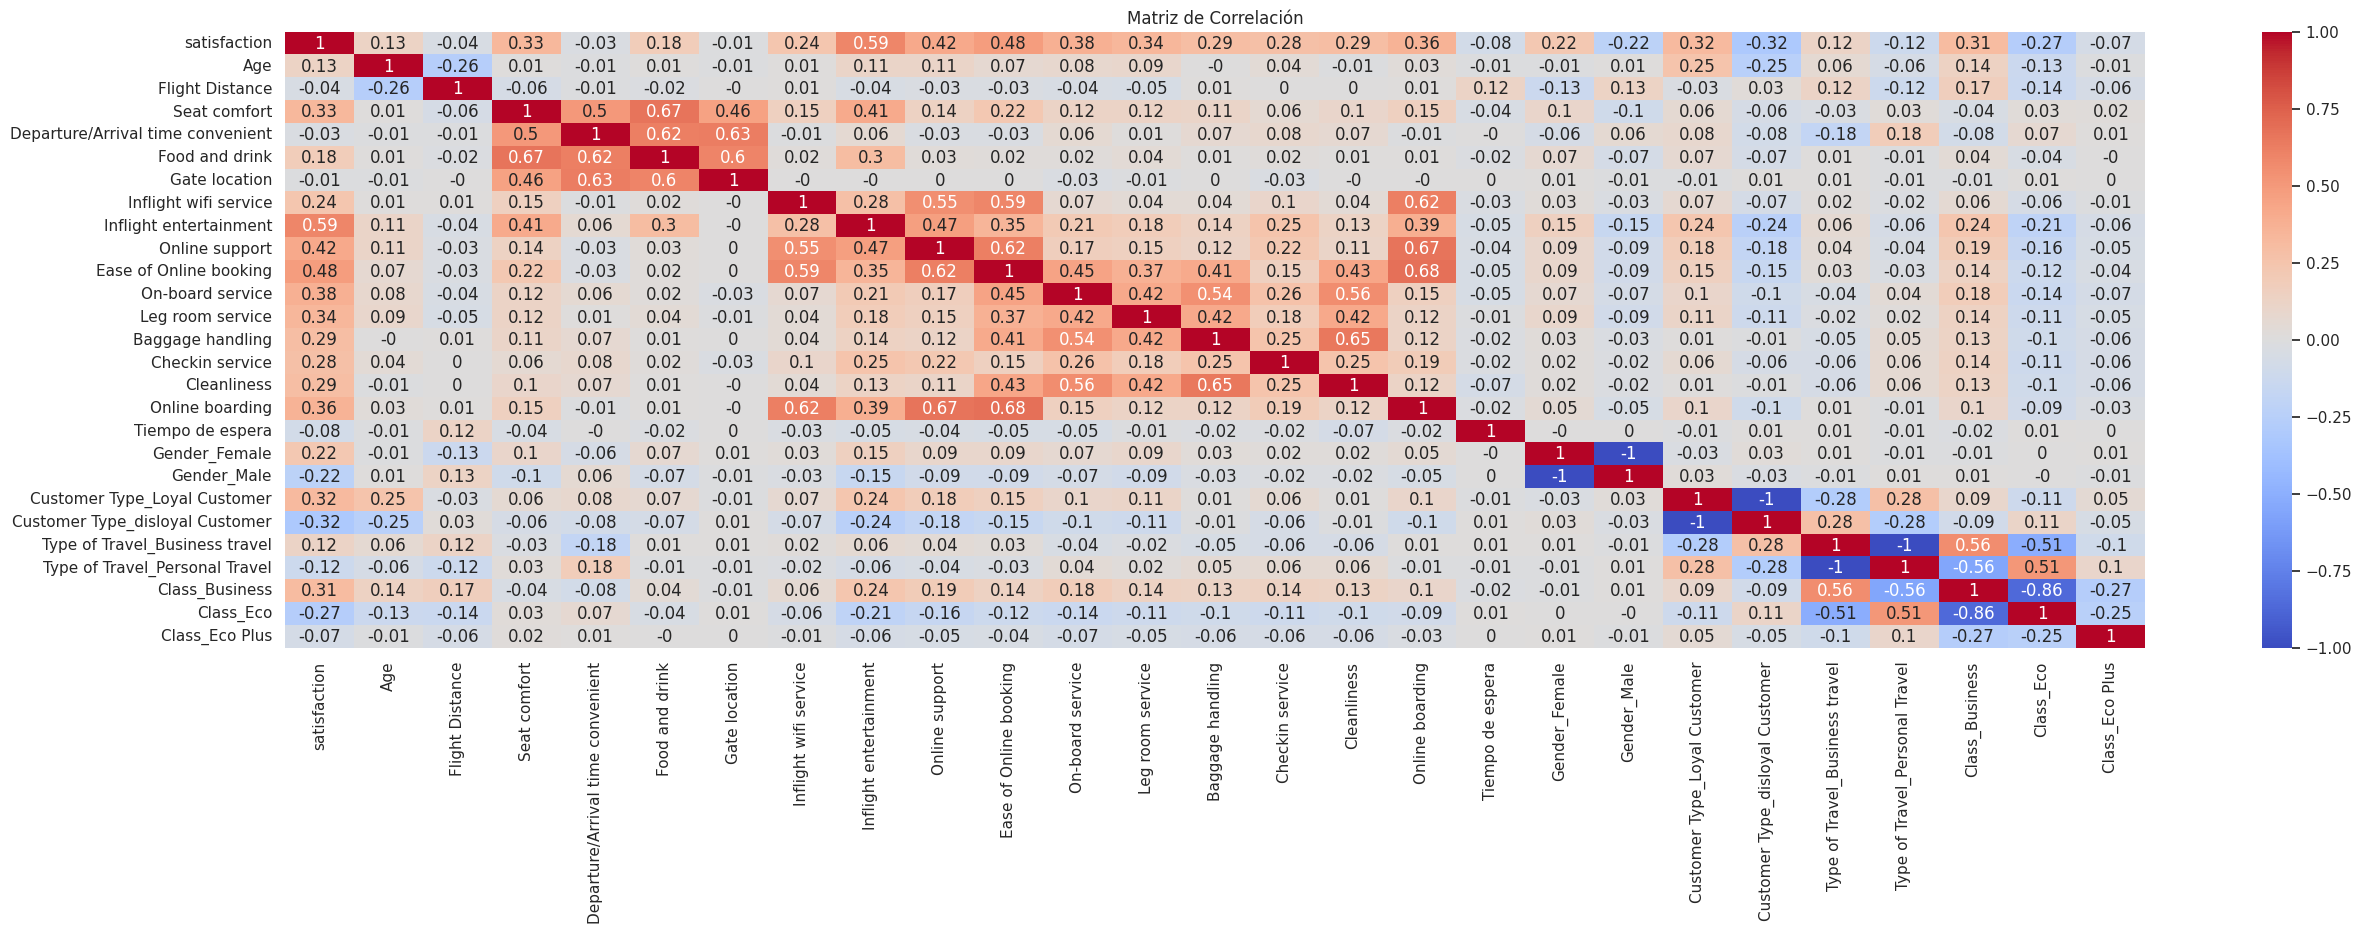

In [ ]:
import numpy as np

# Calcular la matriz de correlación
correlation_matrix = np.round(df.corr(), 2)

# Crear un mapa de calor (heatmap) de la matriz de correlación
plt.figure(figsize=(30, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

In [ ]:
df.describe()


,satisfaction,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,...,Tiempo de espera,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
count,119255.000000,119255.000000,119255.000000,119255.000000,119255.000000,119255.000000,119255.000000,119255.000000,119255.000000,119255.000000,...,119255.000000,119255.000000,119255.000000,119255.000000,119255.000000,119255.000000,119255.000000,119255.000000,119255.000000,119255.000000
mean,0.541436,39.856157,1994.709144,0.487613,0.533189,0.496864,0.500457,0.565209,0.616846,0.634975,...,17.575976,0.507040,0.492960,0.839168,0.160832,0.691334,0.308666,0.486252,0.440124,0.073624
std,0.498282,15.027477,1038.057310,0.324429,0.348793,0.332776,0.327809,0.328023,0.312878,0.324230,...,39.953032,0.499953,0.499953,0.367377,0.367377,0.461945,0.461945,0.499813,0.496404,0.261159
min,0.000000,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,28.000000,1359.000000,0.250000,0.250000,0.250000,0.250000,0.250000,0.500000,0.500000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,40.000000,1941.000000,0.500000,0.500000,0.500000,0.500000,0.500000,0.750000,0.750000,...,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,51.000000,2571.000000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,1.000000,...,18.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,85.000000,6951.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1592.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Implementación de Random Forest ###

In [ ]:
from pandas.core.frame import DataFrame
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


# Lee tus datos
# Asumiendo que tienes un DataFrame llamado 'data' con tus características y la variable objetivo 'target'
# Puedes ajustar la variable objetivo según tu problema
target = 'satisfaction'
features = [col for col in df.columns if col != target]

# Divide tus datos en características (X) y variable objetivo (y)
X = df[features]
y = df[target]

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializa y entrena el clasificador RandomForest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = rf_classifier.predict(X_test)

# Calcula la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo: {accuracy}")

# Obtiene la importancia de las características
feature_importances = rf_classifier.feature_importances_

# Crea un DataFrame para visualizar la importancia de las características
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Ordena el DataFrame por importancia en orden descendente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Muestra las características más influyentes
print(feature_importance_df)


Accuracy del modelo: 0.9576956941008763
                              Feature  Importance
25                     Class_Eco Plus    0.002246
24                          Class_Eco    0.010290
6               Inflight wifi service    0.015619
21     Type of Travel_Business travel    0.017565
22     Type of Travel_Personal Travel    0.018424
16                   Tiempo de espera    0.019950
18                        Gender_Male    0.020876
5                       Gate location    0.023097
23                     Class_Business    0.023225
3   Departure/Arrival time convenient    0.023720
17                      Gender_Female    0.024455
4                      Food and drink    0.024562
14                        Cleanliness    0.026167
13                    Checkin service    0.026269
0                                 Age    0.027996
12                   Baggage handling    0.028231
19       Customer Type_Loyal Customer    0.031561
1                     Flight Distance    0.031698
20    Cust

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo: {accuracy}")

Accuracy del modelo: 0.9576956941008763


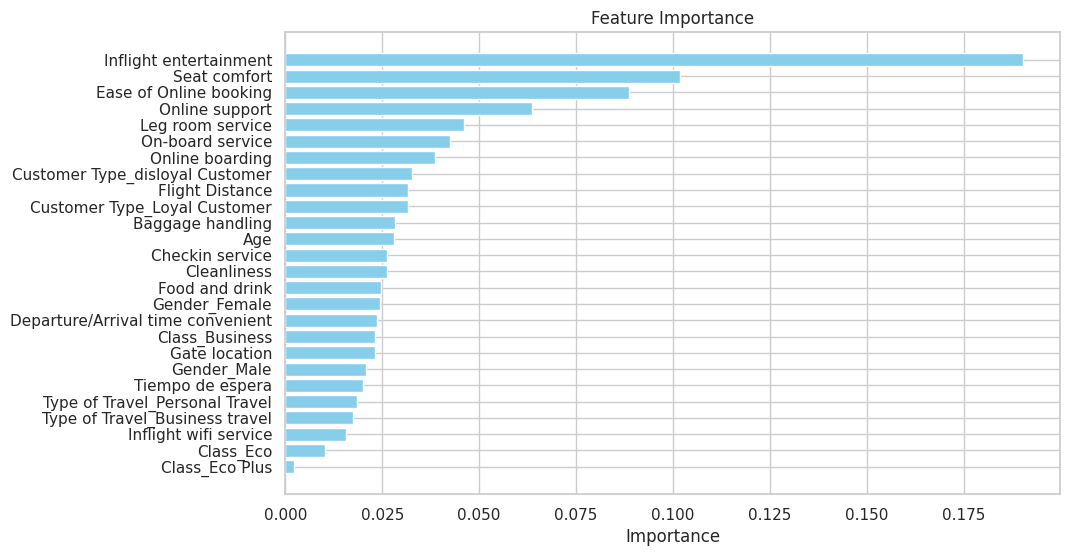

In [ ]:
# Gráfico de barras para visualizar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score, roc_curve, auc
from sklearn.tree import export_text
from sklearn.preprocessing import OneHotEncoder


# Supongamos que tienes un DataFrame llamado 'df' con las características mencionadas
# Asegúrate de tener datos numéricos para 'Age', 'Flight Distance', y 'Tiempo de espera'
features = ['Flight Distance', 'Tiempo de espera',
            'Customer Type',
            'Type of Travel',
            'Class', 'Age', 'Gender']

categoricas = ['Customer Type', 'Type of Travel', 'Class', 'Gender']

X = df_copia[features]

# Invierte el valor de satisfaction para que el valor positivo coincida con insatisfaction.
y = df_copia['satisfaction'].apply(lambda x: 1 if x == 0 else 0)  # Ajusta 'target_variable' según el nombre real de tu variable objetivo


# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
ohe.fit(X_train[categoricas])
ohe_feat = ohe.transform(X_train[categoricas])
ohe_feat = pd.DataFrame(ohe_feat, columns=ohe.get_feature_names_out())
X_train = X_train.reset_index(drop=True)
X_train = X_train.drop(categoricas, axis=1)
X_train = pd.concat([X_train, ohe_feat], axis=1)
X_train

'''


# Inicializa el clasificador de árbol de decisiones
tree_classifier = Pipeline(steps=[('preprocessor', preprocessor),('classifier', DecisionTreeClassifier(max_depth=4, min_samples_split=5, random_state=42))])

# Entrena el modelo
tree_classifier.fit(X_train, y_train)

# Predice en el conjunto de prueba
y_pred = tree_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


# Imprime las métricas
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'F1 Score: {f1}')
print('Confusion Matrix:')
print(conf_matrix)
'''


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


"\n\n\n# Inicializa el clasificador de árbol de decisiones\ntree_classifier = Pipeline(steps=[('preprocessor', preprocessor),('classifier', DecisionTreeClassifier(max_depth=4, min_samples_split=5, random_state=42))])\n\n# Entrena el modelo\ntree_classifier.fit(X_train, y_train)\n\n# Predice en el conjunto de prueba\ny_pred = tree_classifier.predict(X_test)\n\naccuracy = accuracy_score(y_test, y_pred)\nconf_matrix = confusion_matrix(y_test, y_pred)\nprecision = precision_score(y_test, y_pred)\nf1 = f1_score(y_test, y_pred)\n\n\n# Imprime las métricas\nprint(f'Accuracy: {accuracy}')\nprint(f'Precision: {precision}')\nprint(f'F1 Score: {f1}')\nprint('Confusion Matrix:')\nprint(conf_matrix)\n"

### Entrenar RF y LR

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

# Importamos los modelos con default hyperparamertos
#svc = SVC(probability=True)
rf = RandomForestClassifier()
lr = LogisticRegression()

#svc.fit(X_train, y_train)
rf.fit(X_train, y_train)
lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Entrenar Árbol de Decisión

In [ ]:
# Crear el modelo de árbol de decisión
tree = DecisionTreeClassifier(max_depth=4, min_samples_split=5, random_state=42)

# Entrenar el árbol de decisión
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=5, random_state=42)

### Entrenar Red Neuronal ###

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow import keras
from tensorflow.keras import layers, models

# Definir modelo
nn = models.Sequential([
    layers.Dense(1, activation='sigmoid', input_shape=(X_train.shape[1],))
])


# Compila el modelo
nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Entrena el modelo
nn.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
2386/2386 [==============================] - 16s 3ms/step - loss: 91.6544 - accuracy: 0.5571 - val_loss: 0.6212 - val_accuracy: 0.6939
Epoch 2/10
2386/2386 [==============================] - 10s 4ms/step - loss: 0.5965 - accuracy: 0.7065 - val_loss: 0.5652 - val_accuracy: 0.7611
Epoch 3/10
2386/2386 [==============================] - 9s 4ms/step - loss: 0.5866 - accuracy: 0.7272 - val_loss: 0.5968 - val_accuracy: 0.7399
Epoch 4/10
2386/2386 [==============================] - 9s 4ms/step - loss: 0.5885 - accuracy: 0.7290 - val_loss: 0.6752 - val_accuracy: 0.6564
Epoch 5/10
2386/2386 [==============================] - 9s 4ms/step - loss: 0.5884 - accuracy: 0.7296 - val_loss: 0.5958 - val_accuracy: 0.6675
Epoch 6/10
2386/2386 [==============================] - 9s 4ms/step - loss: 0.5851 - accuracy: 0.7309 - val_loss: 0.5556 - val_accuracy: 0.7707
Epoch 7/10
2386/2386 [==============================] - 10s 4ms/step - loss: 0.5845 - accuracy: 0.7301 - val_loss: 0.5971 - val_accur

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Transformar los datos de test
ohe_feat = ohe.transform(X_test[categoricas])
ohe_feat = pd.DataFrame(ohe_feat, columns=ohe.get_feature_names_out())
X_test = X_test.reset_index(drop=True)
X_test = X_test.drop(categoricas, axis=1)
X_test = pd.concat([X_test, ohe_feat], axis=1)

In [ ]:
models = [('Random Forest', rf),
          ('Logistic Regression', lr),
          ('Decision Tree', tree)]

preds_list = []
preds_proba_list = []
for model_name, model in models:
    preds = model.predict(X_test)
    preds_list.append((model_name, preds))

    preds_proba = model.predict_proba(X_test)
    preds_proba_list.append((model_name, preds_proba))

In [ ]:
for model_name, preds in preds_list:
    sns.heatmap(confusion_matrix(preds, y_test), annot=True, fmt='.0f')
    plt.title(model_name)
    plt.show()

In [ ]:
# Predice sobre datos de prueba
y_pred = nn.predict(X_test)
y_pred = (y_pred > 0.574)  # Convertir las probabilidades en clases (binario)

# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print(cm)

In [ ]:
    plt.figure(figsize=(6, 4))  # Establecer el tamaño del gráfico
    sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues')  # Mostrar la matriz de confusión como heatmap
    plt.title(f'Confusion Matrix - Red Neuronal')  # Establecer el título del gráfico
    plt.xlabel('Predicted labels')  # Etiqueta del eje x
    plt.ylabel('True labels')  # Etiqueta del eje y
    plt.show()  # Mostrar el gráfico

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predicciones de probabilidades del modelo
y_probs = nn.predict(X_test)

# Calcular la tasa de falsos positivos (FPR), tasa de verdaderos positivos (TPR) y umbrales
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calcular el área bajo la curva ROC (AUC)
auc = roc_auc_score(y_test, y_probs)

# Graficar la curva ROC
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal para referencia
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
best_threshold = thresholds[np.argmax(tpr - fpr)]
print("Mejor umbral:", best_threshold)

In [ ]:
from sklearn.tree import plot_tree, DecisionTreeClassifier, export_graphviz
import graphviz


# Exportar el árbol a un archivo .dot
dot_data = export_graphviz(tree, out_file=None,
                           feature_names=X_train.columns,  # Si X_train es un DataFrame de pandas
                           class_names=['Satisfecho', 'Insatisfecho'],  # Nombres de las clases si es necesario
                           filled=True, rounded=True, special_characters=True)

# Crear el gráfico del árbol desde el archivo .dot
graph = graphviz.Source(dot_data)

# Mostrar el gráfico del árbol
graph.render('tree_visualization')  # Esto creará un archivo tree_visualization.pdf con la visualización del árbol
graph.view()  # Esto abrirá una ventana con la visualización del árbol

plt.figure(figsize=(24, 16))
plot_tree(tree, feature_names=X_train.columns, class_names=['Insatisfecho', 'Satisfecho'], filled=True, rounded=True)
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
for model_name, preds_proba in preds_proba_list:
    pos_probs = preds_proba[:, 1]
    # plot no skill roc curve
    plt.plot([0, 1], [0, 1], linestyle='--')
    # calculate roc curve for model
    fpr, tpr, _ = roc_curve(y_test, pos_probs)
    roc_auc = auc(fpr, tpr)
    # plot model roc curve
    plt.plot(fpr, tpr, marker='.', label="ROC curve (area = %0.2f)" % roc_auc)
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.title(model_name)
    plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc

y_pred_probs = nn.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)



# Finalmente, utilizamos matplotlib para trazar la curva ROC
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### Métricas

In [ ]:
for model_name, preds in preds_list:
    print('---- Resultados para el algoritmo {}---- \n'.format(model_name))
    print(classification_report(preds, y_test))
    print('--------------------------------------------------------------- \n')